## Q3b. image (20 marks)

### Instructions

In part b, we want to create a "painting" like what we have seen in the instructions of part a:

<img src="../figs/purple_soup.png" width=300/>

Note:
* Part b has 3 parts. You may choose not to submit part 1 as it is an intermediate step to solve part 2
* You may find your code for Q3a part 3, Q3b part 1 and Q3b part 2 is quite similar. No need to worry about "copying and pasting code" for these parts
    * The similarity is due to the fact that Q3a part 3 and Q3b part 1 are "simplified" version of the original problem to be solved by Q3b part 2

---

1. (12 marks) Write the function definition for the function `apply_filter()` to replace the colour of a given image with the given colours. 

    The function takes an image (non-empty 3d `np.ndarray` with dtype `np.uint8`), and a `tuple` of 1d `np.ndarray` with dtype `np.uint8` with length 3 representing the RGB values of colours.

    The function returns a _new_ image (3d `np.ndarray` with dtype `np.uint8`) that is similar to the original image, but with the colours of the image replaced by the given tuple of colours. For each pixel, its colour is replaced by the closest out of the given colours in terms of Euclidean distance.

    * Example: Suppose the given tuple representing colours `(0, 1, 2), (0, 180, 255), (255, 254, 253), (0, 0, 0)` and the pixel of interest has RGB(214, 234, 248). 

        The distance between the pixel and the first colour in the given tuple is:
        $$ dist((214, 234, 248),(0, 1, 2)) = \sqrt{(214 - 0)^2 + (234 - 1)^2 + (248 - 2)^2} = 400.75$$

        The distance between the pixel and the second colour in the given tuple is:
        $$ dist((214, 234, 248),(0, 180, 255)) = \sqrt{(214 - 0)^2 + (234 - 180)^2 + (248 - 255)^2} = 220.8$$

        The distance between the pixel and the third colour in the given tuple is:
        $$ dist((214, 234, 248),(255, 254, 253)) = \sqrt{(214 - 255)^2 + (234 - 254)^2 + (248 - 253)^2} = 45.89$$

        The distance between the pixel and the fourth colour in the given tuple is:
        $$ dist((214, 234, 248),(0, 0, 0)) = \sqrt{(214 - 0)^2 + (234 - 0)^2 + (248 - 0)^2} = 402.56$$

        As the pixel is closest to the third colour in the given tuple, it will be replaced by the third colour (255, 254, 253).

    The shape of the returned `np.ndarray` is the same as the given images. If there is a tie in terms of the distance, any of the closest colours can be used.

    * Hint: 
        * You may want to first calculate the distance between the given image with each colour, then for each colour find out which pixels to replace
        * You may want to use [`np.min()`](https://numpy.org/doc/stable/reference/generated/numpy.min.html) or [`np.argmin()`](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html) providing the optional argument `axis=...`
            * To understand how `axis=...` works in general, see the help slides for workshop 7, "2d array: Element-wise statistics" and Exercise 7.7 from Lecture 7 and the "Element-wise statistics" from Lecture 8 
            * Feel free to learn about how to use `min()` and `argmin()` by searching online or having a look of the official document
    * Note: 
        * You can have a small number of iterations (e.g. iterate over each colour), but no large number of iterations (e.g. iterate over each pixel of the given image) is needed
        * If you find the problem difficult to solve, restricting to having at most 3 colours in the given tuple instead 
        * The image given as an argument should not be changed
    * Example usage:

    <img src="../figs/demo_filter_1.png" width=1000/>

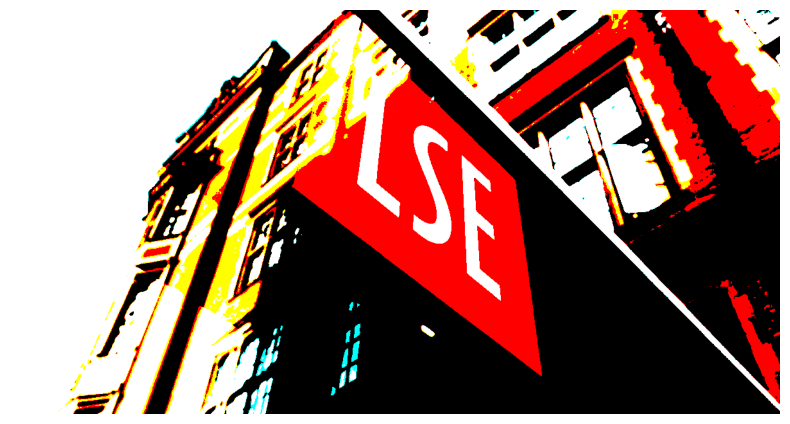

In [1]:
import numpy as np

def euclidean(array1, array2):
    return np.sqrt(np.sum(((array1 - array2) ** 2), axis=-1))

def apply_filter(image, colours):
    '''
    Replaces the colour of a given image with the given colours.
    
    Args:
        image: 3d np.ndarray, non-empty with dtype np.uint8
        colours: tuple of 1d np.ndarray with dtype np.uint8 and length 3 representing RGB values
    
    Returns:
        new_image: 3d np.ndarray with dtype np.uint8, similar to the original image, 
                   but with colours replaced by the closest colours in terms of Euclidean distance
    '''

    # Check the image type and dimensions
    assert isinstance(image, np.ndarray) and image.shape[-1] == 3 and image.dtype == np.uint8, "Invalid image format"

    # Check the colours type and dimensions
    assert isinstance(colours, tuple) and len(colours) > 0, "Invalid colours format"
    for colour in colours:
        assert isinstance(colour, np.ndarray) and colour.shape == (3,) and colour.dtype == np.uint8, "Invalid colour format"

    # Convert all arrays to float32 to avoid wrapping around 256
    colours = [colour.astype(np.float32) for colour in colours]
    image = image.astype(np.float32)

    # Create distance maps between image and each colour in the tuple
    dist_colours = [euclidean(image, colour) for colour in colours]

    # Find the index of the closest colour for each pixel
    closest_colour_indices = np.argmin(dist_colours, axis=0)

    # Create a blank image like the input image
    new_image = np.zeros(image.shape, dtype=image.dtype)

    # Assemble the image
    for i, colour in enumerate(colours):
        closest = closest_colour_indices == i
        new_image[closest] = colour

    return new_image.astype(np.uint8)


from image_util import show, load
import numpy as np

lse = load('../data/lse.jpg')

sample_colours = (
    np.array([255, 0, 0], dtype=np.uint8),
    np.array([0, 255, 255], dtype=np.uint8),
    np.array([255, 255, 0], dtype=np.uint8),
    np.array([0, 0, 0], dtype=np.uint8),
    np.array([255, 255, 255], dtype=np.uint8)
)

show(apply_filter(lse, sample_colours))

---

2. (6 marks) Rewrite the function definition for the function `apply_filter()` to replace the colour of a given image with the given colours. 

    The function takes an image (non-empty 3d `np.ndarray` with dtype `np.uint8`), a `tuple` of 1d `np.ndarray` with dtype `np.uint8` with length 3 representing the RGB values of colours, and another tuple of 1d `np.ndarray` with dtype `np.uint8` with length 3 representing the RGB values of colours. The last argument is _optional_. The two tuples must be at the same length if the last tuple is provided.

    If the optional argument is not provided, it should work the same as it is in part 1. If the optional argument is provided, for each pixel, the colour to replace is the colour in the second tuple that corresponds to the colour that is closest out of the colours in the first tuple in terms of Euclidean distance.
    
* Example: Suppose the first given tuple representing colours `(0, 1, 2), (0, 180, 255), (255, 254, 253), (0, 0, 0)` and the pixel of interest has RGB(214, 234, 248) (i.e. same as the example in part 1), and the second given tuple representing colours `(7, 8, 9), (0, 180, 255), (10, 10, 10), (0, 0, 0)`

    As the pixel is closest to the third colour in the first given tuple, it will be replaced by the third colour in the second given tuple (i.e. (10, 10, 10)).

    * Note: 
        * You can have a small number of iterations (e.g. iterate over each colour), but no large number of iterations (e.g. iterate over each pixel of the given image) is needed
        * The image given as an argument should not be changed 
    * Example usage:

    <img src="../figs/demo_filter_2.png" width=1000/>
    
    * Your implementation:

In [2]:
import numpy as np

def apply_filter(image, colours1, colours2=None):
    '''
    Replaces the colour of a given image with the given colours.
    
    Args:
        image: 3d np.ndarray, non-empty with dtype np.uint8
        colours1: tuple of 1d np.ndarray with dtype np.uint8 and length 3 representing RGB values
        colours2: optional tuple of 1d np.ndarray with dtype np.uint8 and length 3 representing RGB values
        
    Returns:
        new_image: 3d np.ndarray with dtype np.uint8, similar to the original image, 
                   but with colours replaced by the closest colours in terms of Euclidean distance
    '''

    # Check the image type and dimensions
    assert isinstance(image, np.ndarray) and image.shape[-1] == 3 and image.dtype == np.uint8, "Invalid image format"

    # Check the colours1 type and dimensions
    assert isinstance(colours1, tuple) and len(colours1) > 0, "Invalid colours1 format"
    for colour in colours1:
        assert isinstance(colour, np.ndarray) and colour.shape == (3,) and colour.dtype == np.uint8, "Invalid colour format in colours1"

    # Check the colours2 type and dimensions if provided
    if colours2 is not None:
        assert isinstance(colours2, tuple) and len(colours2) == len(colours1), "Invalid colours2 format"
        for colour in colours2:
            assert isinstance(colour, np.ndarray) and colour.shape == (3,) and colour.dtype == np.uint8, "Invalid colour format in colours2"

    # Convert all arrays to float32 to avoid wrapping around 256
    colours1 = [colour.astype(np.float32) for colour in colours1]
    if colours2 is not None:
        colours2 = [colour.astype(np.float32) for colour in colours2]
    image = image.astype(np.float32)

    # Create distance maps between image and each colour in the first tuple
    dist_colours1 = [euclidean(image, colour) for colour in colours1]

    # If colours2 is provided, find the index of the closest colour in colours1 for each pixel
    if colours2 is not None:
        closest_colour_indices1 = np.argmin(dist_colours1, axis=0)

        # Create distance maps between image and each colour in the second tuple
        dist_colours2 = [euclidean(image, colour) for colour in colours2]

        # Find the index of the closest colour in colours2 for each pixel based on the closest colour in colours1
        closest_colour_indices2 = np.array([closest_colour_indices1[i] for i in range(len(closest_colour_indices1))])

        # Create a blank image like the input image
        new_image = np.zeros(image.shape, dtype=image.dtype)

        # Assemble the image based on colours2
        for i, colour in enumerate(colours2):
            closest = closest_colour_indices2 == i
            new_image[closest] = colour

    else:
        # If colours2 is not provided, find the index of the closest colour for each pixel
        closest_colour_indices1 = np.argmin(dist_colours1, axis=0)

        # Create a blank image like the input image
        new_image = np.zeros(image.shape, dtype=image.dtype)

        # Assemble the image based on colours1
        for i, colour in enumerate(colours1):
            closest = closest_colour_indices1 == i
            new_image[closest] = colour

    return new_image.astype(np.uint8)


---

3. (2 marks) Please load in some images and apply `apply_filter()` and `repetition()` from `image_util` to the images to make something like what we have at the beginning of the instruction. Please display the resulting images.

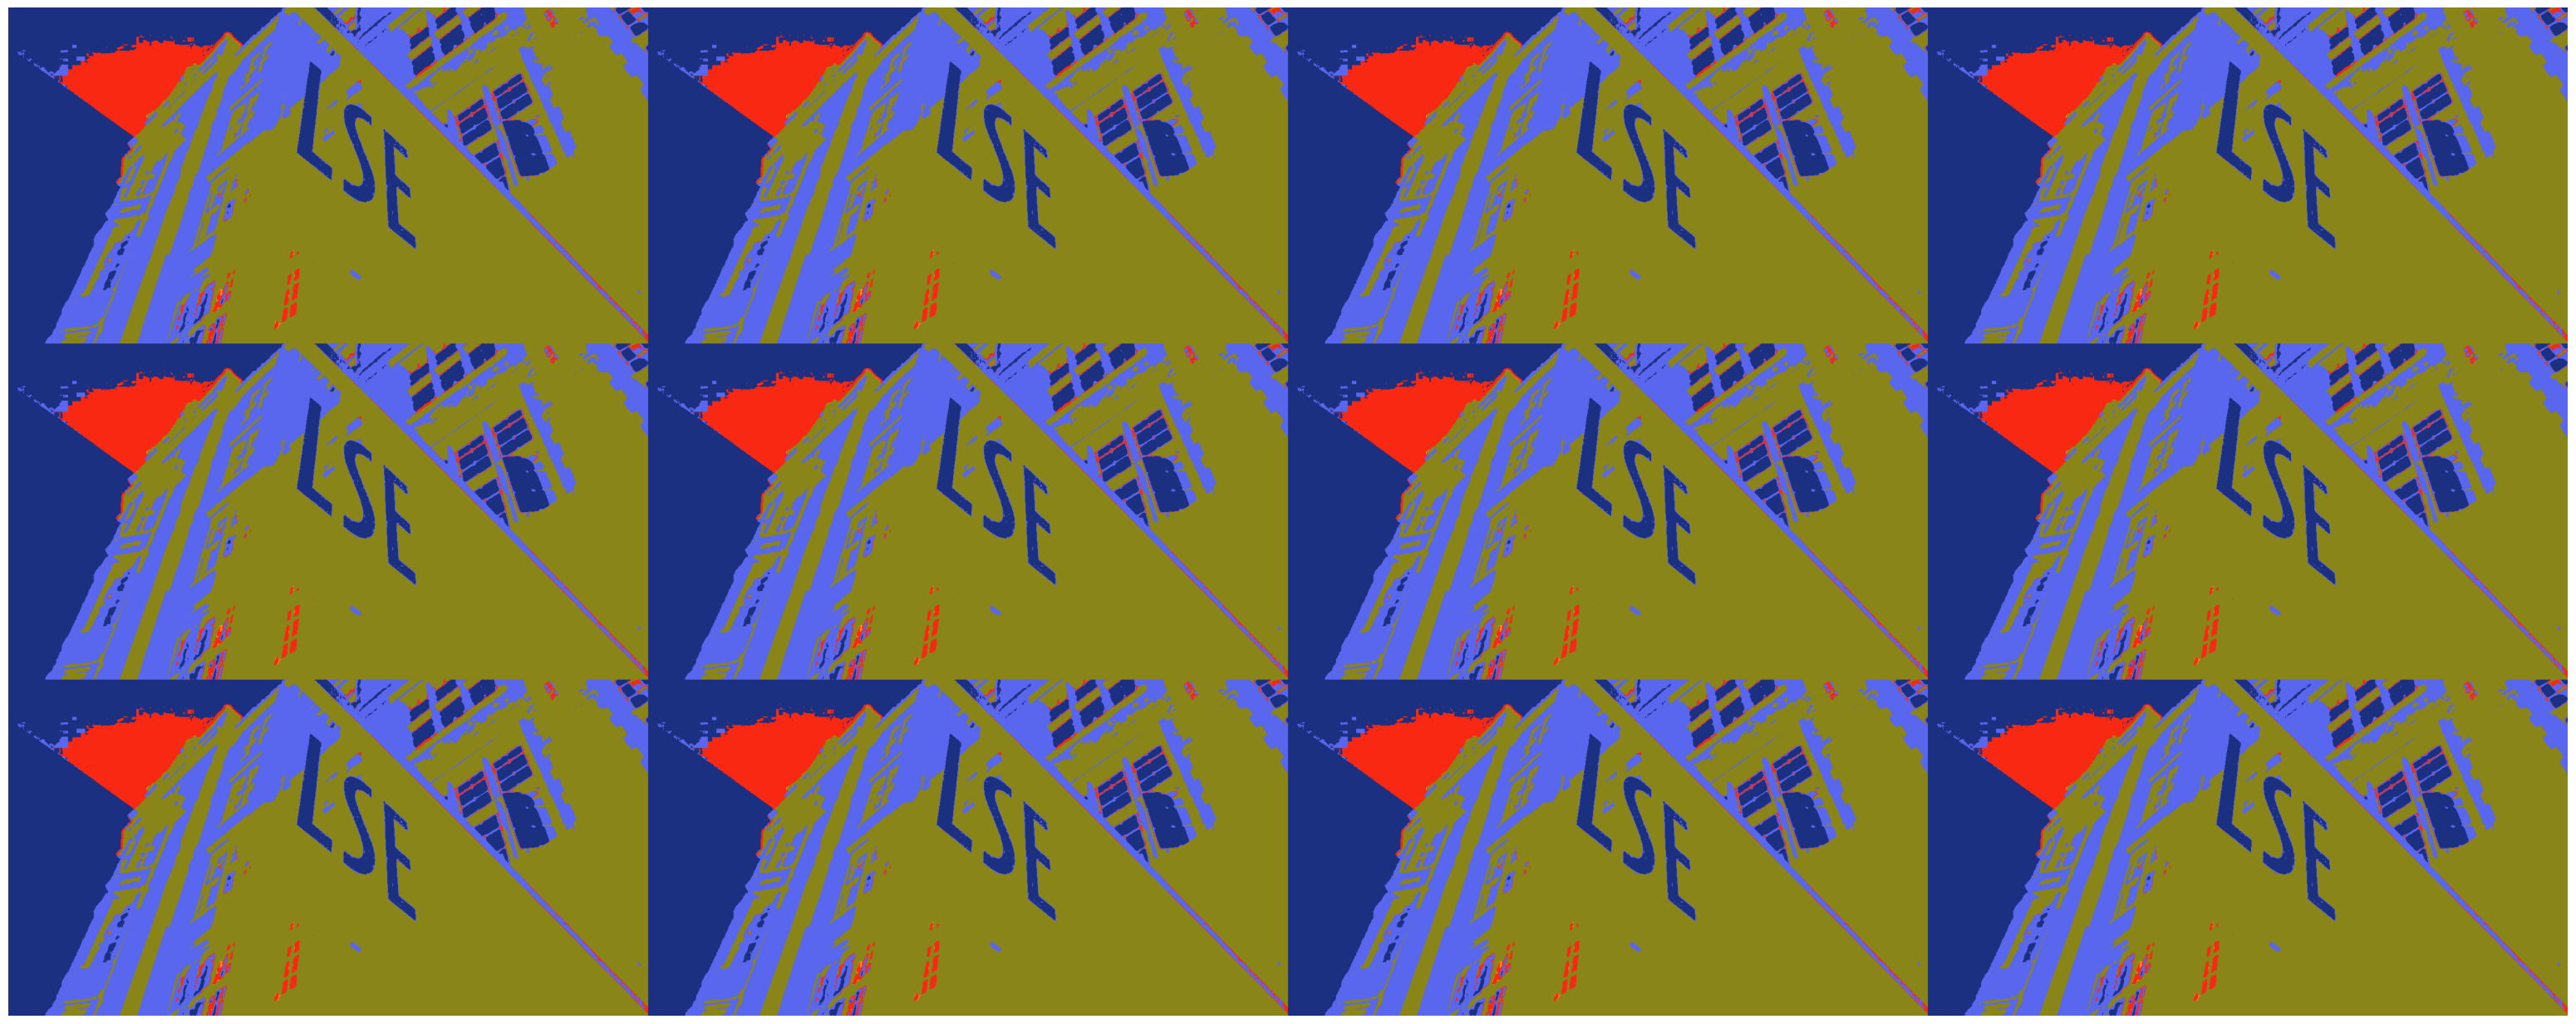

In [40]:
## your code 
import image_util
import random
lse = image_util.load('../data/lse.jpg')

colours = (np.array([255, 0, 0], dtype=np.uint8),
          np.array([255, 255, 0], dtype=np.uint8),
          np.array([0, 255, 255], dtype=np.uint8),
          np.array([255, 255, 255], dtype=np.uint8),
          np.array([0, 0, 0], dtype=np.uint8))
colours_to_replace = (np.array([148, 0, 211], dtype=np.uint8),
                    np.array([0, 255, 255], dtype=np.uint8),
                    np.array([255, 255, 0], dtype=np.uint8),
                    np.array([70, 0, 0], dtype=np.uint8),
                    np.array([255, 255, 255], dtype=np.uint8))
# image_util.show(apply_filter(lse, colours, colours_to_replace))

def gen_random_colour_array(num_colours):
    def rand_int():
        return random.randint(0,255)
    colour_list = []
    for i in range(num_colours):
        colour_list.append(np.array([rand_int(), rand_int(), rand_int()], dtype=np.uint8))
    return tuple(colour_list)

lse_filtered  = apply_filter(lse, gen_random_colour_array(5), gen_random_colour_array(5))
image_util.show(image_util.repetition(lse_filtered, 3, 4))

---

## Requirements

* You cannot use any modules and libraries (except `NumPy`) to answer this question
* This question is designed to assess your ability to manipulate `NumPy` array with vectorised operations and indexing/slicing - therefore, please use `NumPy` and vectorise operations _wherever appropriate and possible_
* You can only use functionalities from `NumPy` that have been demonstrated in the lecture, except it is stated otherwise in the question